## Day 6 Pandas

In [12]:
# import libraries
import pandas as pd
import numpy as np
import pandas as pd

import country_converter as coco
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

salaries_df = pd.read_csv('ds_salaries.csv')
salaries_df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [13]:
num_rows, num_cols = salaries_df.shape
print(f'Number of rows: {num_rows}\nNumber of columns: {num_cols}')

Number of rows: 607
Number of columns: 12


In [14]:
have_duplicate_rows = salaries_df.duplicated().any()
have_duplicate_rows

False

In [15]:
col_dtype = salaries_df.dtypes
col_dtype

Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

👉We will see how many distinguishing values each categorical attribute has using the set() method.



In [16]:
set(salaries_df['work_year'].to_list())


{2020, 2021, 2022}

In [17]:
set(salaries_df['experience_level'].to_list())


{'EN', 'EX', 'MI', 'SE'}

In [19]:
set(salaries_df['employment_type'].to_list())


{'CT', 'FL', 'FT', 'PT'}

In [23]:
set(salaries_df['remote_ratio'].to_list())


{0, 50, 100}

In [25]:
set(salaries_df['company_size'].to_list())


{'L', 'M', 'S'}

In [24]:
set(salaries_df['salary_currency'].to_list())


{'AUD',
 'BRL',
 'CAD',
 'CHF',
 'CLP',
 'CNY',
 'DKK',
 'EUR',
 'GBP',
 'HUF',
 'INR',
 'JPY',
 'MXN',
 'PLN',
 'SGD',
 'TRY',
 'USD'}

In [26]:
set(salaries_df['company_location'].to_list())


{'AE',
 'AS',
 'AT',
 'AU',
 'BE',
 'BR',
 'CA',
 'CH',
 'CL',
 'CN',
 'CO',
 'CZ',
 'DE',
 'DK',
 'DZ',
 'EE',
 'ES',
 'FR',
 'GB',
 'GR',
 'HN',
 'HR',
 'HU',
 'IE',
 'IL',
 'IN',
 'IQ',
 'IR',
 'IT',
 'JP',
 'KE',
 'LU',
 'MD',
 'MT',
 'MX',
 'MY',
 'NG',
 'NL',
 'NZ',
 'PK',
 'PL',
 'PT',
 'RO',
 'RU',
 'SG',
 'SI',
 'TR',
 'UA',
 'US',
 'VN'}

In [22]:
set(salaries_df['employee_residence'].to_list())


{'AE',
 'AR',
 'AT',
 'AU',
 'BE',
 'BG',
 'BO',
 'BR',
 'CA',
 'CH',
 'CL',
 'CN',
 'CO',
 'CZ',
 'DE',
 'DK',
 'DZ',
 'EE',
 'ES',
 'FR',
 'GB',
 'GR',
 'HK',
 'HN',
 'HR',
 'HU',
 'IE',
 'IN',
 'IQ',
 'IR',
 'IT',
 'JE',
 'JP',
 'KE',
 'LU',
 'MD',
 'MT',
 'MX',
 'MY',
 'NG',
 'NL',
 'NZ',
 'PH',
 'PK',
 'PL',
 'PR',
 'PT',
 'RO',
 'RS',
 'RU',
 'SG',
 'SI',
 'TN',
 'TR',
 'UA',
 'US',
 'VN'}

In [27]:
set(salaries_df['job_title'].to_list())


{'3D Computer Vision Researcher',
 'AI Scientist',
 'Analytics Engineer',
 'Applied Data Scientist',
 'Applied Machine Learning Scientist',
 'BI Data Analyst',
 'Big Data Architect',
 'Big Data Engineer',
 'Business Data Analyst',
 'Cloud Data Engineer',
 'Computer Vision Engineer',
 'Computer Vision Software Engineer',
 'Data Analyst',
 'Data Analytics Engineer',
 'Data Analytics Lead',
 'Data Analytics Manager',
 'Data Architect',
 'Data Engineer',
 'Data Engineering Manager',
 'Data Science Consultant',
 'Data Science Engineer',
 'Data Science Manager',
 'Data Scientist',
 'Data Specialist',
 'Director of Data Engineering',
 'Director of Data Science',
 'ETL Developer',
 'Finance Data Analyst',
 'Financial Data Analyst',
 'Head of Data',
 'Head of Data Science',
 'Head of Machine Learning',
 'Lead Data Analyst',
 'Lead Data Engineer',
 'Lead Data Scientist',
 'Lead Machine Learning Engineer',
 'ML Engineer',
 'Machine Learning Developer',
 'Machine Learning Engineer',
 'Machine Lear

In [28]:
# Experience Level
experience_level_dict={'EN':'Entry-level / Junior',
                       'MI':'Mid-level / Intermediate',
                       'SE':'Senior-level / Expert',
                       'EX':'Executive-level / Director'
                      }
salaries_df['experience_level']=salaries_df['experience_level'].map(experience_level_dict)

# Employment Type
employment_type_dict = {'FT':'Full Time',
                        'PT':'Part Time',
                        'CT':'Contract',
                        'FL':'Freelance'}
salaries_df['employment_type'] = salaries_df['employment_type'].map(employment_type_dict)

# Remote_ratio
salaries_df.remote_ratio.replace([100,50,0],['Fully Remote','Partially Remote','On-site'], inplace=True)
salaries_df['remote_ratio']=salaries_df['remote_ratio'].astype(object)

#Employee Residence & Company location
##ISO code
ISO3166 = {'AD': 'Andorra','AE': 'United Arab Emirates','AF': 'Afghanistan','AG': 'Antigua & Barbuda','AI': 'Anguilla',
           'AL': 'Albania','AM': 'Armenia','AN': 'Netherlands Antilles','AO': 'Angola','AQ': 'Antarctica','AR': 'Argentina',
           'AS': 'American Samoa','AT': 'Austria','AU': 'Australia','AW': 'Aruba','AZ': 'Azerbaijan','BA': 'Bosnia and Herzegovina',
           'BB': 'Barbados','BD': 'Bangladesh','BE': 'Belgium','BF': 'Burkina Faso','BG': 'Bulgaria','BH': 'Bahrain','BI': 'Burundi',
           'BJ': 'Benin','BM': 'Bermuda','BN': 'Brunei Darussalam','BO': 'Bolivia','BR': 'Brazil','BS': 'Bahama','BT': 'Bhutan',
           'BU': 'Burma (no longer exists)','BV': 'Bouvet Island','BW': 'Botswana','BY': 'Belarus','BZ': 'Belize','CA': 'Canada',
           'CC': 'Cocos (Keeling) Islands','CF': 'Central African Republic','CG': 'Congo','CH': 'Switzerland','CI': 'Côte D\'ivoire (Ivory Coast)',
           'CK': 'Cook Iislands','CL': 'Chile','CM': 'Cameroon','CN': 'China','CO': 'Colombia','CR': 'Costa Rica','CS': 'Czechoslovakia (no longer exists)',
           'CU': 'Cuba','CV': 'Cape Verde','CX': 'Christmas Island','CY': 'Cyprus','CZ': 'Czech Republic','DD': 'German Democratic Republic (no longer exists)',
           'DE': 'Germany','DJ': 'Djibouti','DK': 'Denmark','DM': 'Dominica','DO': 'Dominican Republic','DZ': 'Algeria','EC': 'Ecuador',
           'EE': 'Estonia','EG': 'Egypt','EH': 'Western Sahara','ER': 'Eritrea','ES': 'Spain','ET': 'Ethiopia','FI': 'Finland','FJ': 'Fiji',
           'FK': 'Falkland Islands (Malvinas)','FM': 'Micronesia','FO': 'Faroe Islands','FR': 'France','FX': 'France, Metropolitan','GA': 'Gabon',
           'GB': 'United Kingdom (Great Britain)','GD': 'Grenada','GE': 'Georgia','GF': 'French Guiana','GH': 'Ghana','GI': 'Gibraltar',
           'GL': 'Greenland','GM': 'Gambia','GN': 'Guinea','GP': 'Guadeloupe','GQ': 'Equatorial Guinea','GR': 'Greece','GS': 'South Georgia and the South Sandwich Islands',
           'GT': 'Guatemala','GU': 'Guam','GW': 'Guinea-Bissau','GY': 'Guyana','HK': 'Hong Kong','HM': 'Heard & McDonald Islands','HN': 'Honduras',
           'HR': 'Croatia','HT': 'Haiti','HU': 'Hungary','ID': 'Indonesia','IE': 'Ireland','IL': 'Israel','IN': 'India','IO': 'British Indian Ocean Territory',
           'IQ': 'Iraq','IR': 'Islamic Republic of Iran','IS': 'Iceland','IT': 'Italy','JM': 'Jamaica','JO': 'Jordan','JP': 'Japan','KE': 'Kenya',
           'KG': 'Kyrgyzstan','KH': 'Cambodia','KI': 'Kiribati','KM': 'Comoros','KN': 'St. Kitts and Nevis','KP': 'Korea, Democratic People\'s Republic of',
           'KR': 'Korea, Republic of','KW': 'Kuwait','KY': 'Cayman Islands','KZ': 'Kazakhstan','LA': 'Lao People\'s Democratic Republic','LB': 'Lebanon',
           'LC': 'Saint Lucia','LI': 'Liechtenstein','LK': 'Sri Lanka','LR': 'Liberia','LS': 'Lesotho','LT': 'Lithuania','LU': 'Luxembourg','LV': 'Latvia',
           'LY': 'Libyan Arab Jamahiriya','MA': 'Morocco','MC': 'Monaco','MD': 'Moldova, Republic of','MG': 'Madagascar','MH': 'Marshall Islands','ML': 'Mali',
           'MN': 'Mongolia','MM': 'Myanmar','MO': 'Macau','MP': 'Northern Mariana Islands','MQ': 'Martinique','MR': 'Mauritania','MS': 'Monserrat','MT': 'Malta',
           'MU': 'Mauritius','MV': 'Maldives','MW': 'Malawi','MX': 'Mexico','MY': 'Malaysia','MZ': 'Mozambique','NA': 'Namibia','NC': 'New Caledonia','NE': 'Niger',
           'NF': 'Norfolk Island','NG': 'Nigeria','NI': 'Nicaragua','NL': 'Netherlands','NO': 'Norway','NP': 'Nepal','NR': 'Nauru','NT': 'Neutral Zone (no longer exists)',
           'NU': 'Niue','NZ': 'New Zealand','OM': 'Oman','PA': 'Panama','PE': 'Peru','PF': 'French Polynesia','PG': 'Papua New Guinea','PH': 'Philippines','PK': 'Pakistan',
           'PL': 'Poland','PM': 'St. Pierre & Miquelon','PN': 'Pitcairn','PR': 'Puerto Rico','PT': 'Portugal','PW': 'Palau','PY': 'Paraguay','QA': 'Qatar','RE': 'Réunion',
           'RO': 'Romania','RU': 'Russian Federation','RW': 'Rwanda','SA': 'Saudi Arabia','SB': 'Solomon Islands','SC': 'Seychelles','SD': 'Sudan','SE': 'Sweden',
           'SG': 'Singapore','SH': 'St. Helena','SI': 'Slovenia','SJ': 'Svalbard & Jan Mayen Islands','SK': 'Slovakia','SL': 'Sierra Leone','SM': 'San Marino',
           'SN': 'Senegal','SO': 'Somalia','SR': 'Suriname','ST': 'Sao Tome & Principe','SU': 'Union of Soviet Socialist Republics (no longer exists)',
           'SV': 'El Salvador','SY': 'Syrian Arab Republic','SZ': 'Swaziland','TC': 'Turks & Caicos Islands','TD': 'Chad','TF': 'French Southern Territories',
           'TG': 'Togo','TH': 'Thailand','TJ': 'Tajikistan','TK': 'Tokelau','TM': 'Turkmenistan','TN': 'Tunisia','TO': 'Tonga','TP': 'East Timor',
           'TR': 'Turkey','TT': 'Trinidad & Tobago','TV': 'Tuvalu','TW': 'Taiwan, Province of China','TZ': 'Tanzania, United Republic of','UA': 'Ukraine',
           'UG': 'Uganda','UM': 'United States Minor Outlying Islands','US': 'United States of America','UY': 'Uruguay','UZ': 'Uzbekistan',
           'VA': 'Vatican City State (Holy See)','VC': 'St. Vincent & the Grenadines','VE': 'Venezuela','VG': 'British Virgin Islands',
           'VI': 'United States Virgin Islands','VN': 'Viet Nam','VU': 'Vanuatu','WF': 'Wallis & Futuna Islands','WS': 'Samoa','YD': 'Democratic Yemen (no longer exists)',
           'YE': 'Yemen','YT': 'Mayotte','YU': 'Yugoslavia','ZA': 'South Africa','ZM': 'Zambia','ZR': 'Zaire','ZW': 'Zimbabwe','ZZ': 'Unknown or unspecified country',
}

salaries_df['employee_residence'] = salaries_df['employee_residence'].map(ISO3166)
salaries_df['company_location'] = salaries_df['company_location'].map(ISO3166)

#Company Size
company_size_dict={'S': 'Small',
                  'M':'Medium',
                  'L':'Large'}
salaries_df.company_size=salaries_df['company_size'].map(company_size_dict)

In [29]:
#mapping the new classification type
employment_classification = {'Data Scientist':'Data Scientist',
                             'Principal Data Scientist':'Data Scientist',
                             'Applied Data Scientist':'Data Scientist',
                             'Data Science Manager':'Data Scientist',
                             'Head of Data Science':'Data Scientist',
                             'Director of Data Science':'Data Scientist',
                             'Staff Data Scientist':'Data Scientist',
                             'Data Science Consultant':'Data Scientist',
                             'Data Science Engineer':'Data Scientist',
                             'Head of Data':'Data Scientist',
                             'Lead Data Scientist':'Data Scientist',
                             'Data Scientist Lead':'Data Scientist',
                             'Data Science Lead':'Data Scientist',
                             'Product Data Scientist':'Data Scientist',
                             'Data Specialist':'Data Scientist',
                             
                             'Big Data Engineer':'Data Engineer',
                             'Data Engineer':'Data Engineer',
                             'Principal Data Engineer':'Data Engineer',
                             'Data Operations Engineer':'Data Engineer',
                             'Lead Data Engineer':'Data Engineer',
                             'Director of Data Engineering':'Data Engineer',
                             'Research Engineer':'Data Engineer',
                             'Data Engineering Manager':'Data Engineer',
                             'Cloud Data Engineer':'Data Engineer',
                             'Data Science Tech Lead':'Data Engineer',
                             'Data Manager':'Data Engineer',
                             'ETL Developer':'Data Engineer',

                             'Product Data Analyst':'Data Analyst',
                             'Data Analyst':'Data Analyst',
                             'Business Data Analyst':'Data Analyst',
                             'Data Science Consultant':'Data Analyst',
                             'BI Data Analyst':'Data Analyst',
                             'BI Analyst':'Data Analyst',
                             'Lead Data Analyst':'Data Analyst',
                             'Data Analytics Engineer':'Data Analyst',
                             'Marketing Data Analyst':'Data Analyst',
                             'Financial Data Analyst':'Data Analyst',
                             'Finance Data Analyst':'Data Analyst',
                             'Principal Data Analyst':'Data Analyst',
                             'Data Analytics Manager':'Data Analyst',
                             'Data Analytics Lead':'Data Analyst',
                             'Analytics Engineer':'Data Analyst',
                             'Data Operations Analyst':'Data Analyst',
                             'Data Analytics Consultant':'Data Analyst',
                             'Power BI Developer':'Data Analyst',
                             
                             'Machine Learning Scientist':'Machine Learning Scientist',
                             'Applied Machine Learning Scientist':'Machine Learning Scientist',
                             'Machine Learning Research Engineer':'Machine Learning Scientist',
                             'Head of Machine Learning':'Machine Learning Scientist',
                             'Machine Learning Manager':'Machine Learning Scientist',
                             
                             'Machine Learning Infrastructure Engineer':'Machine Learning Engineer',
                             'Machine Learning Engineer':'Machine Learning Engineer',
                             'ML Engineer':'Machine Learning Engineer',
                             'Lead Machine Learning Engineer':'Machine Learning Engineer',
                             'Machine Learning Developer':'Machine Learning Engineer',
                             
                             'Data Architect':'Data Architect',
                             'Cloud Data Architect':'Data Architect',
                             'Principal Data Architect':'Data Architect',
                             'Big Data Architect':'Data Architect',
                             
                             'Computer Vision Engineer':'Computer Vision Engineer',
                             'Computer Vision Software Engineer':'Computer Vision Engineer',
                             '3D Computer Vision Researcher':'Computer Vision Engineer',
                             
                             'NLP Engineer':'NLP Engineer',
                             'AI Scientist':'AI Scientist',
                             'Research Scientist':'Research Scientist',
                             'Applied Scientist':'Applied Scientist',
                            }

salaries_df["job_title"] = salaries_df["job_title"].map(employment_classification)

In [30]:
salaries_df.dtypes


Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio          object
company_location      object
company_size          object
dtype: object

In [31]:
missing_ratio = salaries_df.select_dtypes(include=['float64','int64']).isnull().sum()
missing_ratio = missing_ratio / num_rows
columns=list(missing_ratio.index)
values=list(missing_ratio.values)
missing_ratio_df={columns[i]:values[i] for i in range(len(columns))}
missing_ratio_df['']=['missing_ratio']
missing_ratio_df=pd.DataFrame(missing_ratio_df).set_index('')

In [32]:
numeric_info_df=salaries_df.describe()


In [33]:
numeric_info_df=pd.concat([missing_ratio_df,numeric_info_df],axis=0)
numeric_info_df.style.set_properties(**{'background-color': '#C2A3E7' ,'color':'black','border-color': '#8b8c8c'})

,Unnamed: 0,work_year,salary,salary_in_usd
missing_ratio,0.000000,0.000000,0.000000,0.000000
count,607.000000,607.000000,607.000000,607.000000
mean,303.000000,2021.405272,324000.062603,112297.869852
std,175.370085,0.692133,1544357.486636,70957.259411
min,0.000000,2020.000000,4000.000000,2859.000000
25%,151.500000,2021.000000,70000.000000,62726.000000
50%,303.000000,2022.000000,115000.000000,101570.000000
75%,454.500000,2022.000000,165000.000000,150000.000000
max,606.000000,2022.000000,30400000.000000,600000.000000


In [34]:
categorical_df=salaries_df.select_dtypes(exclude=['int64'])
col_names=list(categorical_df.columns)
titles=["missing_ratio", "num_values", "value_ratios"]
values_list=[]
dic={}
for i in col_names:
    df=categorical_df.copy()[[i]]
    size=len(df)
    new=list(df[i].values)
    df[i]=new
    temp=[]
    temp.append(((df[i].isnull().sum()/size)*100).round(3))
    df.dropna(inplace=True)
    vals=list(df[i].values)
    num_vals=list(set(vals))
    temp.append(len(num_vals))
    temp2={}
    new=[(df[i].value_counts()[j]/len(vals)*100).round(3) for j in num_vals]
    temp2={num_vals[j]:new[j] for j in range(len(num_vals))}
    temp2_sort={k:v for k,v in sorted(temp2.items(), key= lambda item:item[1], reverse=True)}
    temp.append(temp2_sort)
    values_list.append(temp)
dic={col_names[i]:values_list[i] for i in range(len(col_names))}
dic['titles']=titles
categorical_info_df=pd.DataFrame(dic).set_index('titles')
categorical_info_df

,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
titles,,,,,,,,
missing_ratio,0.0,0.0,0.0,0.0,0.329,0.0,0.0,0.0
num_values,4,4,10,17,55,3,50,3
value_ratios,"{'Senior-level / Expert': 46.129, 'Mid-level /...","{'Full Time': 96.87, 'Part Time': 1.647, 'Cont...","{'Data Scientist': 31.466, 'Data Engineer': 26...","{'USD': 65.568, 'EUR': 15.651, 'GBP': 7.249, '...","{'United States of America': 54.876, 'United K...","{'Fully Remote': 62.768, 'On-site': 20.923, 'P...","{'United States of America': 58.484, 'United K...","{'Medium': 53.707, 'Large': 32.619, 'Small': 1..."


In [35]:
salary_timeline = pd.DataFrame(salaries_df.groupby("work_year")["salary_in_usd"].mean())
salary_timeline = salary_timeline.reset_index()
salary_timeline.rename(columns = {'salary_in_usd':'mean_salary_in_usd'}, inplace = True)
salary_timeline["work_year"].replace({2020:"2020",2021:"2021",2022:"2022"},inplace=True)
print(f"Let's take a look at the dataframe that contains the data needed for this question: ")
salary_timeline


Let's take a look at the dataframe that contains the data needed for this question: 


,work_year,mean_salary_in_usd
0,2020,95813.000000
1,2021,99853.792627
2,2022,124522.006289


Let's take a look at the change over time of average salary:


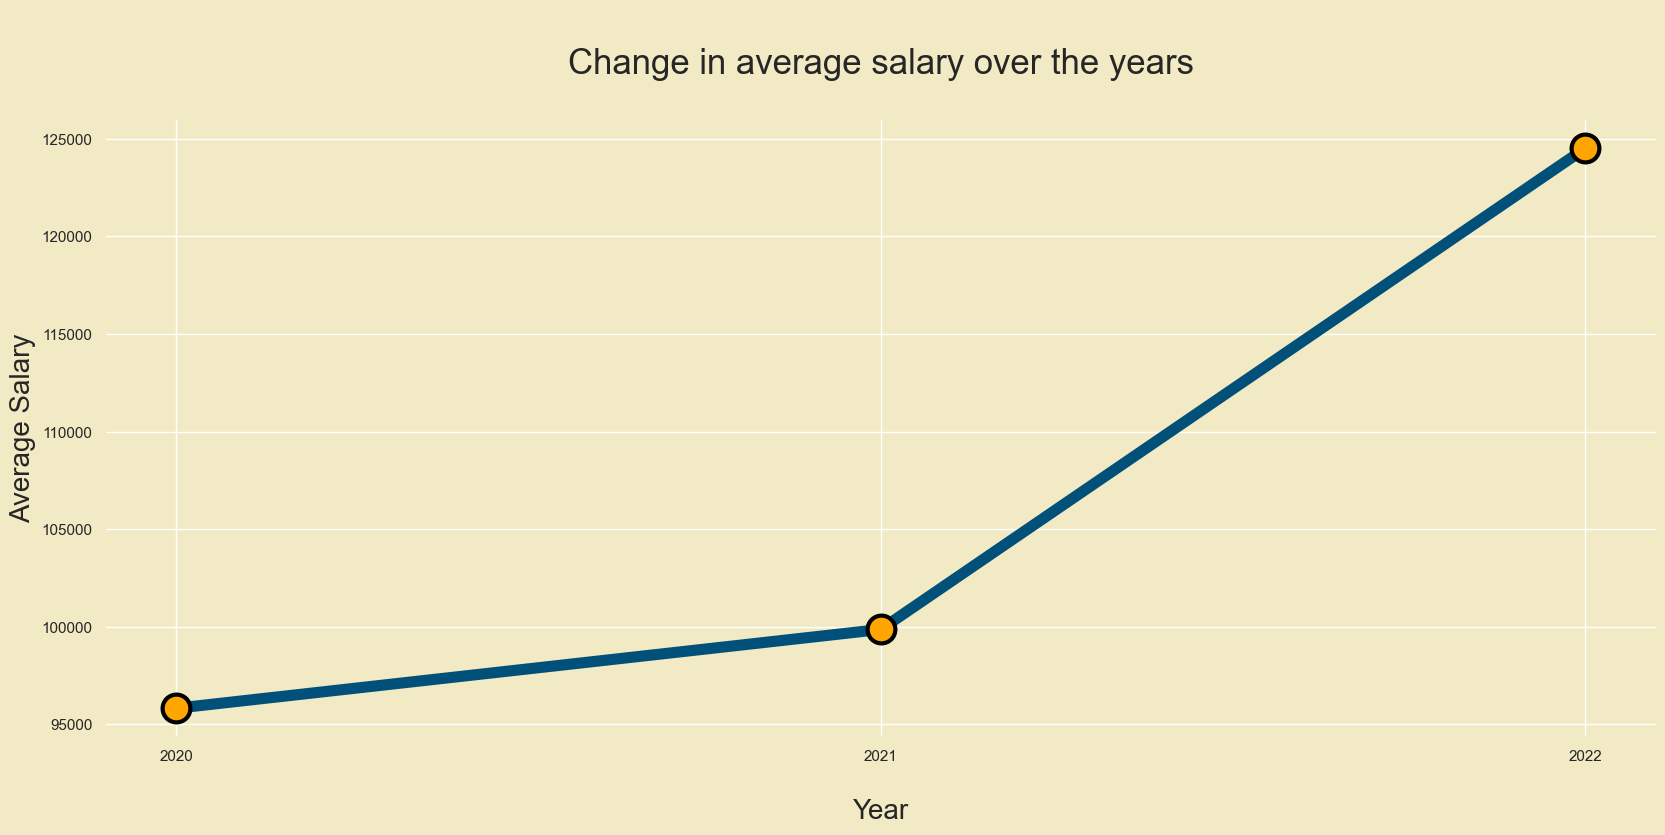

In [36]:
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
palette = ["#11264e","#00507A","#026e90","#008b99","#6faea4","#fcdcb0","#FEE08B","#faa96e","#f36b3b","#ef3f28","#CC0028"]
print(f"Let's take a look at the change over time of average salary:")
plt.subplots(figsize=(20,8))

p=sns.lineplot(x=salary_timeline["work_year"] ,y=salary_timeline["mean_salary_in_usd"],data=salary_timeline,color=palette[1],marker="o",linewidth=8,markersize=20,markerfacecolor="orange",markeredgecolor="black",markeredgewidth=3)
p.axes.set_title("\nChange in average salary over the years\n",fontsize=25)
p.axes.set_xlabel("\nYear",fontsize=20)
p.axes.set_ylabel("Average Salary",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

In [37]:
country_names = coco.convert(names=salaries_df['company_location'], to="ISO3")
salaries_df['company_location'] = country_names
print(f"After converting the country name to ISO code we have:")
salaries_df['company_location'].unique()

After converting the country name to ISO code we have:


array(['DEU', 'JPN', 'GBR', 'HND', 'USA', 'HUN', 'NZL', 'FRA', 'IND',
       'PAK', 'CHN', 'GRC', 'ARE', 'NLD', 'MEX', 'CAN', 'AUT', 'NGA',
       'ESP', 'PRT', 'DNK', 'ITA', 'HRV', 'LUX', 'POL', 'SGP', 'ROU',
       'IRQ', 'BRA', 'BEL', 'UKR', 'ISR', 'RUS', 'MLT', 'CHL', 'IRN',
       'COL', 'MDA', 'KEN', 'SVN', 'CHE', 'VNM', 'ASM', 'TUR', 'CZE',
       'DZA', 'EST', 'MYS', 'AUS', 'IRL'], dtype=object)

In [38]:
salary_location_df = salaries_df.groupby(['salary_in_usd', 'company_location']).size().reset_index()
average_salary = salary_location_df.groupby('company_location').mean().reset_index()
average_salary.rename(columns = {'salary_in_usd':'mean_salary_in_usd'}, inplace = True)
average_salary = average_salary[['company_location','mean_salary_in_usd']]
print(f"Let's take a look at the dataframe that contains the data needed for this question:")
average_salary

Let's take a look at the dataframe that contains the data needed for this question:


,company_location,mean_salary_in_usd
0,ARE,100000.000000
1,ASM,18053.000000
2,AUS,108042.666667
3,AUT,72920.750000
4,BEL,85699.000000
5,BRA,18602.666667
6,CAN,101908.500000
7,CHE,64114.000000
8,CHL,40038.000000
9,CHN,71665.500000


In [39]:
print(f"Let's take a look at the average salaries by countries:")

fig = px.choropleth(locations=average_salary['company_location'],
                    color=average_salary['mean_salary_in_usd'],
                    color_continuous_scale=px.colors.sequential.RdBu,
                    template='plotly_dark')
fig.update_layout(font = dict(size=17,family="Courier new"))

fig.update_layout(
    title="Average Salary by Company Location", title_x=0.5,
    font=dict(
        family="Rubik",
        size=18
    )
)

fig.show()

Let's take a look at the average salaries by countries:


In [40]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
def get_country_jobs(data,year):
    country_col,job_col='employee_residence','job_title'
    df=data.copy()[[country_col,job_col]]

    df.dropna(inplace=True)
    country_names=list(set(list(df[country_col].values)))
    country_vals=[]
    for c in country_names:
        sub_df=df[df[country_col]==c]
        jobs=list(sub_df[job_col].values)
        jobs=[i.split(';') for i in jobs]
        jbs=np.array([j for i in jobs for j in i])
        n,c=np.unique(jbs,return_counts=True)[0],np.unique(jbs,return_counts=True)[1]
        c=((c/jbs.shape[0])*100).round(1)
        n,c=list(n),list(c)
        dic_jbs=dict(zip(n,c))
        dic_jbs_sort={k:v for k,v in sorted(dic_jbs.items(), key= lambda item:item[1], reverse=True)}
        temp=[]
        temp.append(dic_jbs_sort)
        country_vals.append(temp)
    country_jobs_dict={country_names[i]:country_vals[i] for i in range(len(country_names))}
    country_jobs_dict['titles']=year
    country_jobs_df=pd.DataFrame(country_jobs_dict).set_index('titles')
    return country_jobs_df
df2020=get_country_jobs(salaries_df[salaries_df['work_year']==2020],'2020')
df2021=get_country_jobs(salaries_df[salaries_df['work_year']==2021],'2021')
df2022=get_country_jobs(salaries_df[salaries_df['work_year']==2022],'2022')
country_jobs_df=pd.concat([df2020, df2021, df2022], axis=0)
country_jobs_df

C:\Users\Zahid Ali\AppData\Local\Temp\ipykernel_9756\1450020977.py:1: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



,Portugal,China,United Arab Emirates,Austria,Greece,Philippines,New Zealand,United Kingdom (Great Britain),Netherlands,France,Nigeria,Poland,United States of America,Hungary,Mexico,Italy,Croatia,Spain,Denmark,Honduras,India,Germany,Japan,Canada,Russian Federation,Pakistan,Brazil,Malta,Viet Nam,Chile,Iraq,Puerto Rico,Singapore,"Moldova, Republic of",Kenya,Belgium,Hong Kong,Turkey,Ukraine,Colombia,Luxembourg,Slovenia,Islamic Republic of Iran,Czech Republic,Bulgaria,Romania,Malaysia,Australia,Estonia,Bolivia,Ireland,Switzerland,Algeria,Tunisia,Argentina
titles,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020,"{'Data Engineer': 50.0, 'Machine Learning Engineer': 50.0}",{'Machine Learning Engineer': 100.0},{'Data Scientist': 100.0},"{'Data Engineer': 50.0, 'Data Scientist': 50.0}","{'Data Engineer': 50.0, 'Data Scientist': 50.0}",{'Data Scientist': 100.0},{'Data Engineer': 100.0},"{'Data Engineer': 66.7, 'Data Scientist': 33.3}",{'Research Scientist': 100.0},"{'Data Scientist': 66.7, 'Data Analyst': 16.7, 'Data Engineer': 16.7}",{'Data Analyst': 100.0},{'Data Engineer': 100.0},"{'Data Scientist': 36.0, 'Data Analyst': 32.0, 'Data Engineer': 16.0, 'Machine Learning Engineer': 12.0, 'Research Scientist': 4.0}",{'Data Scientist': 100.0},{'Data Engineer': 100.0},{'Data Scientist': 100.0},{'Machine Learning Engineer': 100.0},"{'Data Engineer': 66.7, 'Data Scientist': 33.3}",{'AI Scientist': 100.0},{'Data Analyst': 100.0},"{'Data Analyst': 75.0, 'Data Scientist': 25.0}","{'Data Scientist': 66.7, 'Data Engineer': 16.7, 'Machine Learning Engineer': 16.7}","{'Data Engineer': 50.0, 'Machine Learning Scientist': 50.0}",{'Machine Learning Scientist': 100.0},{'Computer Vision Engineer': 100.0},"{'Data Analyst': 50.0, 'Data Engineer': 50.0}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021,{'Research Scientist': 100.0},NaN,NaN,NaN,"{'Data Analyst': 50.0, 'Data Scientist': 50.0}",NaN,NaN,"{'Data Engineer': 41.7, 'Data Scientist': 33.3, 'Data Analyst': 16.7, 'Research Scientist': 8.3}","{'Data Engineer': 66.7, 'Machine Learning Engineer': 33.3}","{'Data Scientist': 44.4, 'Research Scientist': 33.3, 'Data Analyst': 22.2}",{'Data Scientist': 100.0},"{'Data Engineer': 50.0, 'Machine Learning Engineer': 50.0}","{'Data Scientist': 32.2, 'Data Engineer': 26.4, 'Data Analyst': 24.1, 'Machine Learning Engineer': 8.0, 'Machine Learning Scientist': 4.6, 'Data Architect': 3.4, 'Computer Vision Engineer': 1.1}",{'Data Analyst': 100.0},{'Data Scientist': 100.0},"{'Data Engineer': 33.3, 'Data Scientist': 33.3, 'Machine Learning Engineer': 33.3}",NaN,"{'Data Scientist': 33.3, 'AI Scientist': 16.7, 'Data Analyst': 16.7, 'Data Engineer': 16.7, 'Machine Learning Engineer': 16.7}",{'Computer Vision Engineer': 100.0},NaN,"{'Data Scientist': 42.9, 'Data Engineer': 23.8, 'Machine Learning Engineer': 14.3, 'Data Analyst': 9.5, 'AI Scientist': 4.8, 'Computer Vision Engineer': 4.8}","{'Data Scientist': 43.8, 'Data Analyst': 31.2, 'Machine Learning Engineer': 12.5, 'Computer Vision Engineer': 6.2, 'Data Engineer': 6.2}","{'Machine Learning Engineer': 75.0, 'Data Scientist': 25.0}","{'Data Scientist': 44.4, 'Research Scientist': 33.3, 'Data Analyst': 11.1, 'Data Architect': 11.1}",{'Data Scientist': 100.0},"{'AI Scientist': 50.0, 'Machine Learning Scientist': 50.0}","{'Computer Vision Engineer': 40.0, 'AI Scientist': 20.0, 'Data Engineer': 20.0, 'Data Scientist': 20.0}",{'Data Engineer': 100.0},"{'Data Analyst': 33.3, 'Data Scientist': 33.3, 'Machine Learning Scientist': 33.3}",{'Data Scientist': 100.0},{'Machine Learning Engineer': 100.0},{'Data Engineer': 100.0},"{'Data Engineer': 50.0, 'Data Scientist': 50.0}",{'Data Engineer': 100.0},{'Data Analyst': 100.0},{'Machine Learning Engineer': 100.0},{'Data Engineer': 100.0},"{'Data Engineer': 66.7, 'Data Scientist': 33.3}",{'Data Scientist': 100.0},{'Machine Learning Engineer': 100.0},{'Data Analyst': 100.0},"{'Data Scientist': 50.0, 'Machine L

In [41]:
country_jobs_df['Viet Nam']


titles
2020    NaN                                                                               
2021    {'Data Analyst': 33.3, 'Data Scientist': 33.3, 'Machine Learning Scientist': 33.3}
2022    NaN                                                                               
Name: Viet Nam, dtype: object

In [42]:
df=salaries_df[['job_title','employee_residence','company_location']]
l0=list(df['job_title'].values)
l1=list(df['employee_residence'].values)
l2=list(df['company_location'].values)
job_titles=[l0[i] for i in range(len(l0)) if l1[i]!=l2[i]]
set_job_titles=list(set(job_titles))
job_titles_df=pd.DataFrame({'data':job_titles})
percents=[]
for i in set_job_titles:
    percents.append(((job_titles_df['data'].value_counts()[i]/len(job_titles_df))*100).round(1))
job_titles_series=pd.Series(index=set_job_titles,data=percents)
job_titles_series=job_titles_series.sort_values(ascending=False)
job_titles_series

Data Scientist                31.5
Data Engineer                 26.4
Data Analyst                  23.4
Machine Learning Engineer     8.9 
Research Scientist            2.6 
Machine Learning Scientist    2.3 
Data Architect                2.0 
Computer Vision Engineer      1.6 
AI Scientist                  1.2 
NLP Engineer                  0.2 
dtype: float64

In [43]:
job_titles_series.index


Index(['Data Scientist', 'Data Engineer', 'Data Analyst',
       'Machine Learning Engineer', 'Research Scientist',
       'Machine Learning Scientist', 'Data Architect',
       'Computer Vision Engineer', 'AI Scientist', 'NLP Engineer'],
      dtype='object')

TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

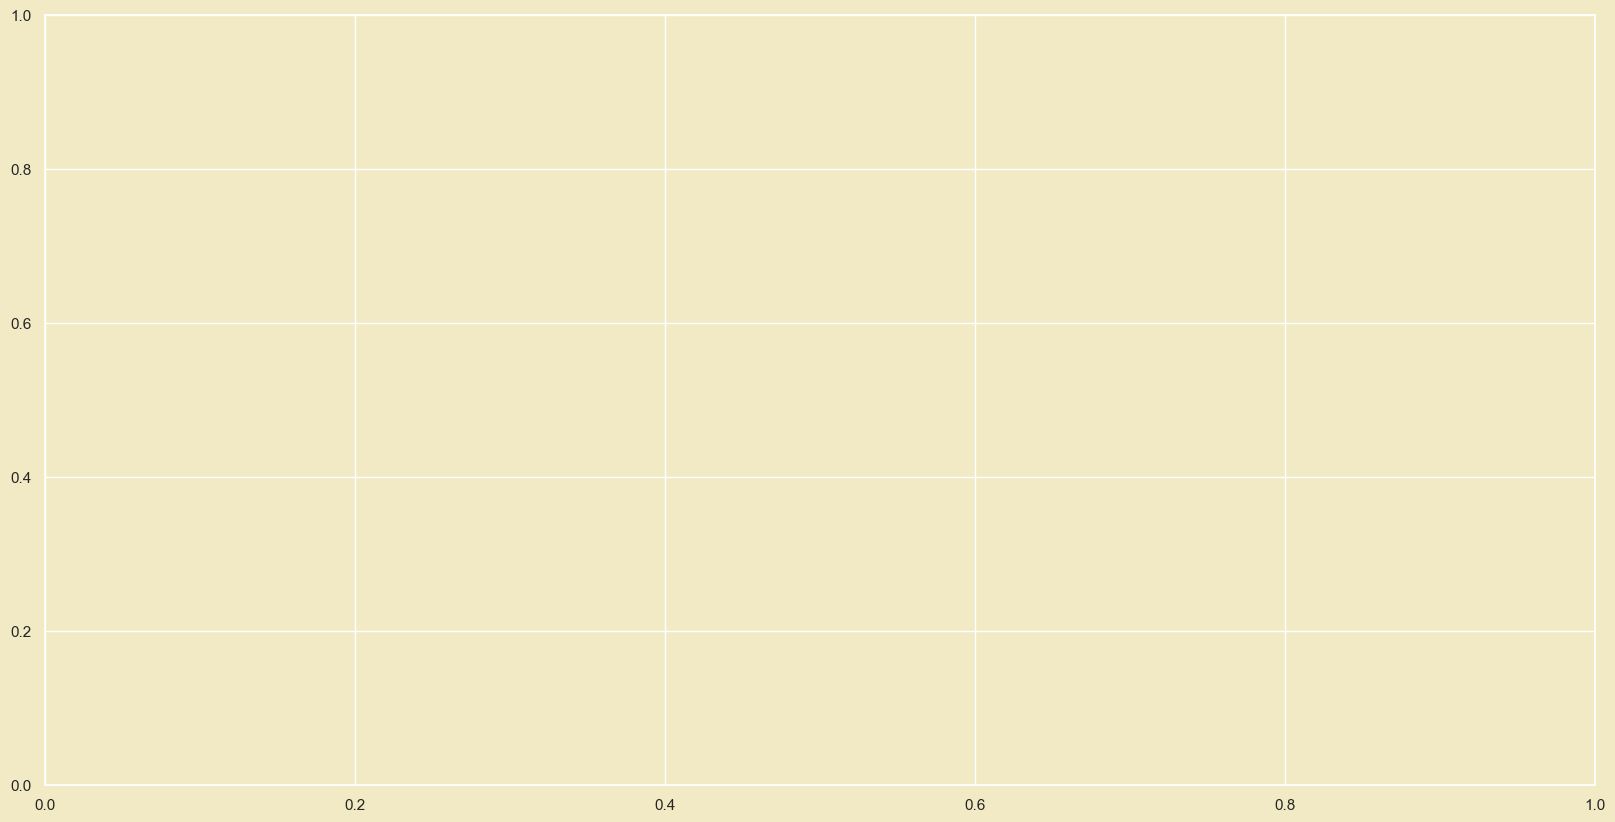

In [44]:
plt.subplots(figsize=(20, 10))
p=sns.barplot(job_titles_series.values,job_titles_series.index,palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 4)
p.axes.set_title("\nPercentage working abroad of each job\n",fontsize=25)
p.axes.set_xlabel("Percentage working abroad",fontsize=20)
p.axes.set_ylabel("Job Title",fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=25,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 2, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

Let's take a look at average wages across types of employees by company sizes:


C:\Users\Zahid Ali\AppData\Local\Temp\ipykernel_9756\4206045364.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




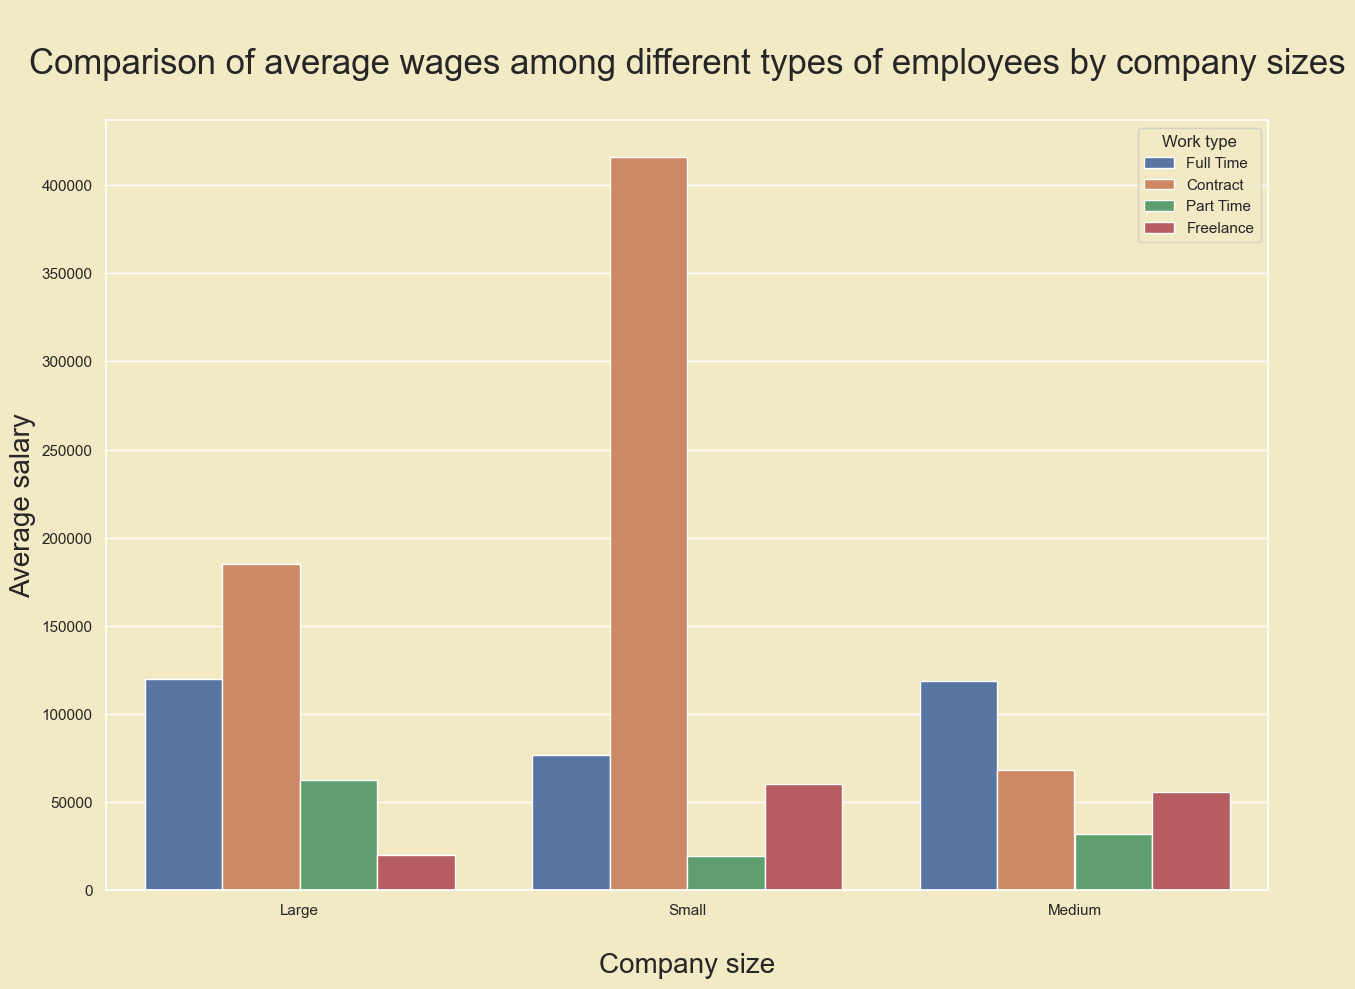

In [45]:
print(f"Let's take a look at average wages across types of employees by company sizes:")
plt.subplots(figsize=(15, 10))
p = sns.barplot(data=salaries_df, x='company_size', y='salary_in_usd', hue='employment_type', ci=None)
p.set_title('\nComparison of average wages among different types of employees by company sizes\n', fontsize=25)
p.set_xlabel('\nCompany size', fontsize=20)
p.set_ylabel('Average salary', fontsize=20)
plt.legend(title='Work type')
plt.show()

In [46]:
year_salary=salaries_df.groupby(["work_year","experience_level"])["salary_in_usd"].mean()
year_salary=year_salary.reset_index()
year_salary

,work_year,experience_level,salary_in_usd
0,2020,Entry-level / Junior,63648.600000
1,2020,Executive-level / Director,202416.500000
2,2020,Mid-level / Intermediate,85950.062500
3,2020,Senior-level / Expert,137240.500000
4,2021,Entry-level / Junior,59101.021277
5,2021,Executive-level / Director,223752.727273
6,2021,Mid-level / Intermediate,85490.088889
7,2021,Senior-level / Expert,126596.188406
8,2022,Entry-level / Junior,65423.428571
9,2022,Executive-level / Director,178313.846154


In [47]:
fig=px.line(year_salary,x="work_year",y="salary_in_usd",color="experience_level",
            symbol="experience_level", title='Average salary of experience levels by year')
fig.update_layout(yaxis_title="Salary $",xaxis_title="Years",xaxis=dict(tickmode='array',tickvals=[2020, 2021, 2022]))

In [48]:
role_salary = salaries_df.groupby('job_title',as_index=False)['salary_in_usd'].mean()
role_salary = role_salary.sort_values(by='salary_in_usd',ascending=False)
role_salary

,job_title,salary_in_usd
3,Data Architect,171359.666667
7,Machine Learning Scientist,145122.714286
5,Data Scientist,122261.570681
4,Data Engineer,115047.868750
9,Research Scientist,109019.500000
6,Machine Learning Engineer,104704.796296
2,Data Analyst,97400.894366
0,AI Scientist,66135.571429
1,Computer Vision Engineer,58767.100000
8,NLP Engineer,37236.000000


In [50]:
fig=px.bar(role_salary, x='job_title',y='salary_in_usd',color='job_title',
    labels={'job_title':'Job Title','salary_in_usd':'Salary $'},
    title='Top 10 Highest Paying Roles in Data Science')
fig.show()